<a href="https://colab.research.google.com/github/pastoril10/Matriz_RiscoVSRetorno/blob/main/Matriz_Risco_vs_Retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

# 1. Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf
yf.pdr_override()

from plotly.subplots import make_subplots
import plotly.graph_objs as go

# 2. Obtenção dos dados das ações

Selecionando as 15 ações com as maiores altas no dia 31/01/2021 - Informações retiradas do site infomoney.

In [ ]:
ativos = ["AZUL4.SA", "BPAN4.SA", "GOLL4.SA", 
          "CVCB3.SA", "LWSA3.SA", "NTCO3.SA", 
          "TOTS3.SA", "PCAR3.SA", "PETZ3.SA", 
          "MGLU3.SA", "ENEV3.SA", "JHSF3.SA", 
          "HYPE3.SA", "POSI3.SA", "VIIA3.SA"]



Determinando a data de inicio para a coleta dos dados.


In [ ]:
inicio = "2020-01-01"

In [ ]:
df = pd.DataFrame()

Coletando o fechamento ajustado para cada uma das 15 ações a serem analisadas.

In [ ]:
for i in ativos:
  df[i] = yf.download(i, start =inicio)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,AZUL4.SA,BPAN4.SA,GOLL4.SA,CVCB3.SA,LWSA3.SA,NTCO3.SA,TOTS3.SA,PCAR3.SA,PETZ3.SA,MGLU3.SA,ENEV3.SA,JHSF3.SA,HYPE3.SA,POSI3.SA,VIIA3.SA
Date,,,,,,,,,,,,,,,
2020-01-02,58.799999,10.255314,37.169998,44.709999,NaN,38.330002,22.631338,83.268066,NaN,12.029736,10.9650,6.803895,33.410034,9.779281,11.73
2020-01-03,56.759998,10.698330,35.900002,44.200001,NaN,41.000000,23.112442,83.268066,NaN,11.922436,11.0675,7.269425,34.096794,9.567525,11.48
2020-01-06,55.000000,10.943399,34.250000,43.820000,NaN,40.130001,22.585522,83.268066,NaN,11.932190,11.3500,7.305236,33.317226,9.172888,11.48
2020-01-07,56.820000,10.933975,34.450001,44.400002,NaN,40.779999,22.680431,83.268066,NaN,11.898049,11.2650,7.367902,32.992405,9.509774,11.65
2020-01-08,56.919998,10.839717,35.810001,44.340000,NaN,40.990002,22.376064,81.506767,NaN,12.263844,11.2125,7.251521,32.565502,9.278768,11.60


# 3. Análise gráfica - Normalizando os valores pelo dia 1.

Com este gráfico, podemos análisar o comportamento da ação em relação ao primeiro dia.

In [ ]:
df_norm = df/df.iloc[0]

In [ ]:
fig = make_subplots(rows=1, cols=1)
for i in ativos:
  fig.append_trace(go.Scatter(x = df_norm.index, 
                            y = df_norm[i], 
                            name = i, 
                            mode = 'lines'),
                 row=1,
                 col=1)
  
  fig.update_xaxes(showgrid=True, 
                 gridwidth=1, 
                 gridcolor='lightgray',
                 showline=True, 
                 linewidth=1, 
                 linecolor='black', 
                 row = 1, 
                 col = 1)
  
  fig.update_yaxes(title_text = "ret_simples", 
                 showgrid=True, 
                 gridwidth=1, 
                 gridcolor='lightgray',
                 showline=True, linewidth=1, 
                 linecolor='black', 
                 row = 1, 
                 col = 1)
  
fig.update_layout(plot_bgcolor = 'white',
                    font = {'family': 'Arial','size': 16,'color': 'black'})
fig.update_layout(height= 500, 
                    width=1000, 
                    title_text=" Comportamento das ações a partir do dia {}".format(inicio))
#{}")
fig.show()  


Criando novo dataframe que recebe os valores diarios.

Utilizando o comando pct_change

In [ ]:
retorno_diario = df.pct_change()

In [ ]:
retorno_diario.head()

,AZUL4.SA,BPAN4.SA,GOLL4.SA,CVCB3.SA,LWSA3.SA,NTCO3.SA,TOTS3.SA,PCAR3.SA,PETZ3.SA,MGLU3.SA,ENEV3.SA,JHSF3.SA,HYPE3.SA,POSI3.SA,VIIA3.SA
Date,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.034694,0.043199,-0.034167,-0.011407,NaN,0.069658,0.021258,0.000000,NaN,-0.008920,0.009348,0.068421,0.020555,-0.021654,-0.021313
2020-01-06,-0.031008,0.022907,-0.045961,-0.008597,NaN,-0.021219,-0.022798,0.000000,NaN,0.000818,0.025525,0.004926,-0.022863,-0.041248,0.000000
2020-01-07,0.033091,-0.000861,0.005839,0.013236,NaN,0.016197,0.004202,0.000000,NaN,-0.002861,-0.007489,0.008578,-0.009749,0.036726,0.014808
2020-01-08,0.001760,-0.008621,0.039478,-0.001351,NaN,0.005150,-0.013420,-0.021152,NaN,0.030744,-0.004661,-0.015796,-0.012939,-0.024291,-0.004292


In [ ]:
retorno_diario.dropna(inplace=True)

In [ ]:
fig = make_subplots(rows=len(ativos),cols=1, subplot_titles = ("AZUL4.SA", "BPAN4.SA", "GOLL4.SA","CVCB3.SA", "LWSA3.SA", "NTCO3.SA", 
          "TOTS3.SA", "PCAR3.SA", "PETZ3.SA", 
          "MGLU3.SA", "ENEV3.SA", "JHSF3.SA", 
          "HYPE3.SA", "POSI3.SA", "VIIA3.SA"))

n = 1

for i in ativos:
  fig.append_trace(go.Scatter(x = retorno_diario.index, 
                            y = retorno_diario[i], 
                            name = i, 
                            mode = 'lines'),
                 row=n,
                 col=1)

  fig.update_xaxes(showgrid=True, 
                 gridwidth=1, 
                 gridcolor='lightgray',
                 showline=True, 
                 linewidth=1, 
                 linecolor='black', 
                 row = n, 
                 col = 1)

  fig.update_yaxes(title_text = "ret_simples", 
                 showgrid=True, 
                 gridwidth=1, 
                 gridcolor='lightgray',
                 showline=True, linewidth=1, 
                 linecolor='black', 
                 row = n, 
                 col = 1)
  n = n+1

# o comando fig.update_layout nos permite alterar o layout do gráfico
fig.update_layout(plot_bgcolor = 'white',
                    font = {'family': 'Arial','size': 16,'color': 'black'})
fig.update_layout(height=3000, 
                    width=1000, 
                    title_text="Retorno simples das ações")
fig.show()  

# 5. Criando DataFrame com o retorno e o risco dos ativos

O que é desvio padrão?

O desvio padrão é um conceito matemático básico que mede a volatilidade no mercado ou o valor médio pelo qual os pontos de dados individuais diferem da média. Simplificando, o desvio padrão ajuda a determinar o *spread* dos preços dos ativos em relação ao preço médio.

*Definição: Um spread pode ter vários significados em finanças. Geralmente, o spread refere-se à diferença entre dois preços, taxas ou rendimentos.*

Quando os preços oscilam para cima ou para baixo significativamente, o desvio padrão é alto, o que significa que há alta volatilidade. Por outro lado, quando há um spread estreito entre as faixas de negociação, o desvio padrão é baixo, o que significa que a volatilidade é baixa. O que podemos determinar com isso? Preços voláteis significam que o desvio padrão é alto e é baixo quando os preços estão relativamente calmos e não sujeitos a oscilações bruscas.

Nos investimento, o desvio padrão é usado como indicador da volatilidade do mercado e, portanto, do risco. Quanto mais imprevisível a ação do preço e quanto mais amplo o intervalo, maior o risco. 


Importante: Quanto maior o desvio padrão, mais arriscado é o investimento.

Fonte: https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp

In [ ]:
volatilidade = pd.DataFrame(retorno_diario.std(), 
                     columns = ["Vol"])

In [ ]:
retornos_medios = pd.DataFrame(retorno_diario.mean(), 
                     columns = ["Retornos"])

Concatenando os dois Dataframes - Juntando as duas colunas.

In [ ]:
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)

In [ ]:
risco_retorno

,Retornos,Vol
AZUL4.SA,0.000735,0.035666
BPAN4.SA,0.001455,0.040181
GOLL4.SA,0.000228,0.035805
CVCB3.SA,0.000093,0.037735
LWSA3.SA,-0.000390,0.042193
NTCO3.SA,-0.002154,0.025051
TOTS3.SA,0.000339,0.024901
PCAR3.SA,0.004124,0.067038
PETZ3.SA,0.000848,0.028792
MGLU3.SA,-0.002763,0.034933


# 6 Matriz risco x retorno

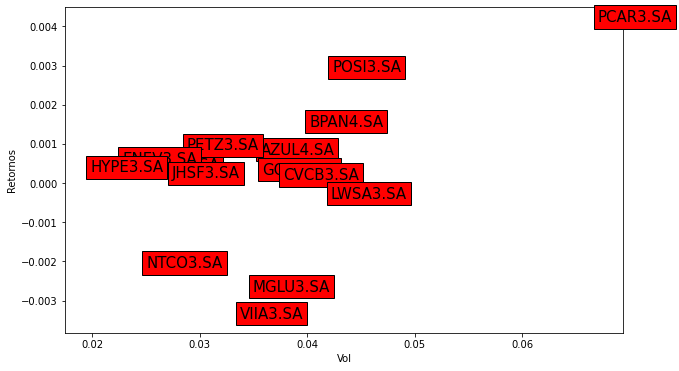

In [ ]:
plt.subplots(figsize = (10,6))

sns.scatterplot(data = risco_retorno,
                x = "Vol",
                y = "Retornos")

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], 
           y = risco_retorno.Retornos[i], 
           s = risco_retorno.index[i],
           fontdict = dict(color = 'black', size = 15 ),
           bbox = dict(facecolor = "red"), 
           )

#7. Correlação entre as ações listas

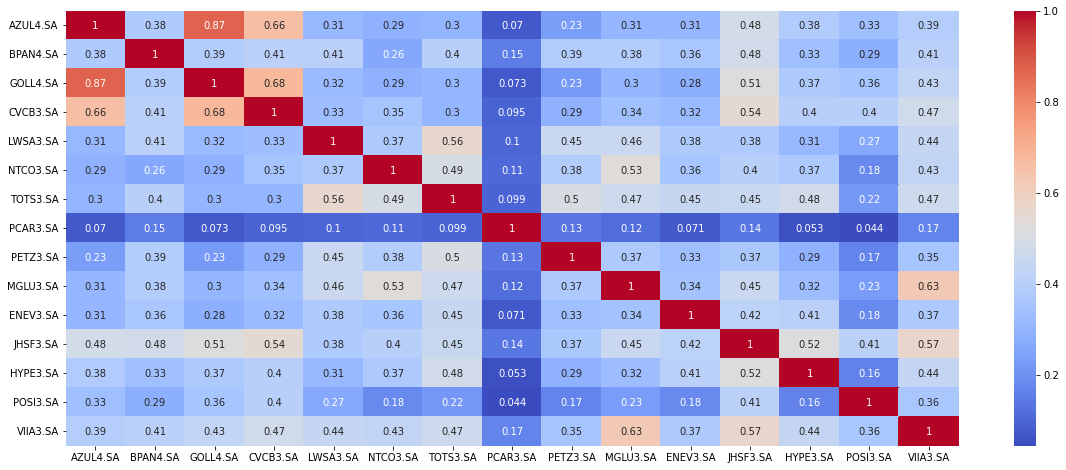

In [ ]:
#corr = varejo.xs(key='Adj Close', level='Informações das ações', axis=1).corr()
corr = retorno_diario.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Perceba que existe uma correlação forte entre as ações do mesmo seguimento, como por exemplo:

Azul, Gol e também a CVC, Magalu e Via etc